In [16]:
!pip install lightgbm
!pip install wheel

DEPRECATION: Python 2.7 reached the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 is no longer maintained. pip 21.0 will drop support for Python 2.7 in January 2021. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support


DEPRECATION: Python 2.7 reached the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 is no longer maintained. pip 21.0 will drop support for Python 2.7 in January 2021. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import tensorflow as tf
from sklearn.metrics import mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor
#from lightgbm import LGBMRegressor

In [2]:
air = pd.read_csv("../Resources/airdata3.csv")
air = air.drop(columns = {"Unnamed: 0", "Country", "count", "min", "variance", "Specie", "max"})
air.head()

,Date,City,median
0,2020-03-08,Florence,50.0
1,2020-03-18,Florence,59.0
2,2020-03-31,Florence,21.0
3,2020-04-14,Florence,42.0
4,2020-03-03,Florence,21.0


In [3]:
#new thing:
data3 = air.copy()
data3 = data3.sort_values(by = ["Date"])
data3['DatePriorMed'] = data3.groupby(['City'])['median'].shift()
data3 = data3.dropna()

data3.head()

,Date,City,median,DatePriorMed
306,2020-01-11,Milan,157.0,155.0
638,2020-01-11,Santiago,54.0,50.0
62,2020-01-11,Florence,74.0,109.0
712,2020-01-11,Mumbai,160.0,155.0
862,2020-01-11,London,28.0,33.0


In [4]:
df = data3.copy()
df = df.drop(columns = {'Date','City'})
df.head()

,median,DatePriorMed
306,157.0,155.0
638,54.0,50.0
62,74.0,109.0
712,160.0,155.0
862,28.0,33.0


In [5]:
#70%train,10% val, 20% test

train_i = int(len(df.index) * 0.7)
val_i = int(len(df.index)*0.8)

train_x=df['median'].iloc[:train_i].to_numpy()
train_y=df['DatePriorMed'].iloc[:train_i].to_numpy()

val_x=df['median'].iloc[train_i:val_i].to_numpy()
val_y=df['DatePriorMed'].iloc[train_i:val_i].to_numpy()

test_x=df['median'].iloc[val_i:].to_numpy()
test_y=df['DatePriorMed'].iloc[val_i:].to_numpy()

print(train_x.shape)
print(train_x)
print(train_y)

(702,)
[157.  54.  74. 160.  28. 104.  83. 117.  42.  95.  68.  63.  21. 165.
 134.  58.  56. 147. 152.  87.  46. 147. 117.  21.  55.  95.  65.  74.
  25. 175. 158.  59. 102. 101.  57. 122.  79. 169.  85. 104.  28. 134.
  54. 156. 122. 160. 117.  90.  59.  99.  29.  93. 152.  99. 130. 114.
 154.  70. 159. 107.  25.  65. 104. 104. 137. 162. 287.  74.  71.  38.
  56.  95.  67. 171.  46.  46. 165.  73.  97.  91.  59. 169.  59.  62.
  78. 168.  30.  70.  38.  25. 168. 102.  65.  86. 122.  53.  65. 166.
  77. 109.  85. 163. 164.  82.  83. 155.  87.  64.  55.  97. 132.  59.
  95. 165.  73. 164. 155.  93. 160. 109.  89. 159.  63. 157.  50.  58.
  68.  57. 155.  72. 196. 167. 107.  70.  56.  63.  85. 230.  35.  52.
  57. 171.  80. 158.  21. 124.  65. 113. 232.  32.  56. 161.  70.  37.
 151.  42.  21.  30.  70. 132.  57. 248.  33. 139.  70. 154.  52.  65.
  60.  53.  42.  65.  65.  53.  25. 142. 134.  63. 141.  99.  18.  75.
  74. 152. 144. 153. 154.  57.  61. 109. 159.  61.  75. 154. 154.  31.

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(6, activation = 'relu', input_shape=(1,)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1)
])
epochs = 100

model.compile(optimizer = 'adam',
              loss = 'mean_squared_error',
              metrics = ['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 28        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 45
Trainable params: 45
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.fit(
    train_x,
    train_y,
    epochs=epochs,
    validation_data = (val_x,val_y),
    validation_freq=1
)

Train on 702 samples, validate on 101 samples
Epoch 1/100
702/702 [==============================] - 0s 615us/sample - loss: 12547.7421 - acc: 0.0000e+00 - val_loss: 6785.5767 - val_acc: 0.0000e+00
Epoch 2/100
702/702 [==============================] - 0s 40us/sample - loss: 9320.3993 - acc: 0.0000e+00 - val_loss: 4975.8325 - val_acc: 0.0000e+00
Epoch 3/100
702/702 [==============================] - 0s 38us/sample - loss: 6799.6399 - acc: 0.0000e+00 - val_loss: 3524.0664 - val_acc: 0.0000e+00
Epoch 4/100
702/702 [==============================] - 0s 37us/sample - loss: 4807.5878 - acc: 0.0000e+00 - val_loss: 2441.0554 - val_acc: 0.0000e+00
Epoch 5/100
702/702 [==============================] - 0s 36us/sample - loss: 3317.8676 - acc: 0.0000e+00 - val_loss: 1672.8417 - val_acc: 0.0000e+00
Epoch 6/100
702/702 [==============================] - 0s 36us/sample - loss: 2313.1463 - acc: 0.0000e+00 - val_loss: 1242.0644 - val_acc: 0.0000e+00
Epoch 7/100
702/702 [==============================]

702/702 [==============================] - 0s 38us/sample - loss: 757.3051 - acc: 0.0000e+00 - val_loss: 533.0157 - val_acc: 0.0000e+00
Epoch 55/100
702/702 [==============================] - 0s 38us/sample - loss: 757.2791 - acc: 0.0000e+00 - val_loss: 532.7459 - val_acc: 0.0000e+00
Epoch 56/100
702/702 [==============================] - 0s 40us/sample - loss: 757.6346 - acc: 0.0000e+00 - val_loss: 533.1798 - val_acc: 0.0000e+00
Epoch 57/100
702/702 [==============================] - 0s 36us/sample - loss: 757.0294 - acc: 0.0000e+00 - val_loss: 532.3943 - val_acc: 0.0000e+00
Epoch 58/100
702/702 [==============================] - 0s 38us/sample - loss: 757.0228 - acc: 0.0000e+00 - val_loss: 532.2892 - val_acc: 0.0000e+00
Epoch 59/100
702/702 [==============================] - 0s 38us/sample - loss: 757.4157 - acc: 0.0000e+00 - val_loss: 531.9023 - val_acc: 0.0000e+00
Epoch 60/100
702/702 [==============================] - 0s 37us/sample - loss: 756.4664 - acc: 0.0000e+00 - val_loss: 5

In [8]:
model.evaluate(test_x, test_y)
prediction = model.predict(test_x)

201/201 [==============================] - 0s 40us/sample - loss: 351.6185 - acc: 0.0000e+00


In [9]:
# Calculate the mean_squared_error and the r-squared value
# for the testing data

from sklearn.metrics import mean_squared_error, r2_score

### BEGIN SOLUTION

# Use our model to make predictions
predicted = model.predict(test_x)

# Score the predictions with mse and r2
mse = mean_squared_error(test_y, predicted)
r2 = r2_score(test_y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

### END SOLUTION

Mean Squared Error (MSE): 351.6185423042861
R-squared (R2 ): 0.5843838547109963


In [ ]:
#model.save('whatever.h5')
#model.load('whatever.h5')

In [ ]:
#prediction

In [ ]:
# x = soemthing this is today

#graph = []
#for 100

#    predict = model.predict(x)
#   
#    graph.append(prediction)
#   
#    x = predict.y

In [10]:
# Assign the data to X and y

X = data3[["DatePriorMed"]]
y = data3["median"].values.reshape(-1, 1)
print(X.shape, y.shape)

(1004, 1) (1004, 1)


In [11]:
# Use train_test_split to create training and testing data

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### END SOLUTION

In [12]:
# Create the model using LinearRegression

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
### END SOLUTION

In [13]:
# Fit the model to the training data and calculate the scores for the training and testing data


### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.6739133316665591
Testing Score: 0.5686579390080178


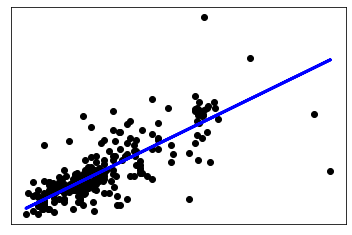

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set

y_pred = regr.predict(X_test)

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
#NOW WHAT?!